In [1]:
import sys, os, glob
sys.path.append('../src')
from scipy.io import loadmat
from scipy.stats import wilcoxon, ranksums
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from utils import temporal_sort

In [2]:
# sampling rate 12 Hz
tpre = 6
t0 = 60 # song onset
t1 = t0 + 12

In [3]:
fnames = glob.glob(f'./processed_data/*.csv')
data = dict()
for f in fnames:
    data[f.split('/')[-1][:-4]] = np.loadtxt(f, delimiter=',')

# signal_* are the trial-averaged time series
# mean_* and se_* are the mean and standard error over the 1-s time window after song onset t0

signal_mean_corr, signal_se_corr = data['signal_mean_corr'], data['signal_se_corr']
mean_corr, se_corr = data['mean_corr'], data['se_corr']
print('Normal song responses, trial mean and SE: (time, neurons)', 
      signal_mean_corr.shape, signal_se_corr.shape)
print('Normal song window-averaged responses, trial mean and SE: (neurons,)', 
      mean_corr.shape, se_corr.shape)

signal_mean_pert, signal_se_pert = data['signal_mean_pert'], data['signal_se_pert']
mean_pert, se_pert = data['mean_pert'], data['se_pert']
print('DAF responses, trial mean and SE: (time, neurons)', 
      signal_mean_pert.shape, signal_se_pert.shape)
print('DAF window-averaged responses, trial mean and SE: (neurons,)', 
      mean_pert.shape, se_pert.shape)

signal_mean_predeaf, signal_se_predeaf = data['signal_mean_predeaf'], data['signal_se_predeaf']
mean_predeaf, se_predeaf = data['mean_predeaf'], data['se_predeaf']
print('Pre-deaf song responses, trial mean and SE: (time, neurons)', 
      signal_mean_predeaf.shape, signal_se_predeaf.shape)
print('Pre-deaf song window-averaged responses, trial mean and SE: (neurons,)', 
      mean_predeaf.shape, se_predeaf.shape)

signal_mean_postdeaf, signal_se_postdeaf = data['signal_mean_postdeaf'], data['signal_se_postdeaf']
mean_postdeaf, se_postdeaf = data['mean_postdeaf'], data['se_postdeaf']
print('Post-deaf song responses, trial mean and SE: (time, neurons)', 
      signal_mean_postdeaf.shape, signal_se_postdeaf.shape)
print('Post-deaf song window-averaged responses, trial mean and SE: (neurons,)', 
      mean_postdeaf.shape, se_postdeaf.shape)

Normal song responses, trial mean and SE: (time, neurons) (18, 397) (18, 397)
Normal song window-averaged responses, trial mean and SE: (neurons,) (397,) (397,)
DAF responses, trial mean and SE: (time, neurons) (18, 397) (18, 397)
DAF window-averaged responses, trial mean and SE: (neurons,) (397,) (397,)
Pre-deaf song responses, trial mean and SE: (time, neurons) (18, 161) (18, 161)
Pre-deaf song window-averaged responses, trial mean and SE: (neurons,) (161,) (161,)
Post-deaf song responses, trial mean and SE: (time, neurons) (18, 161) (18, 161)
Post-deaf song window-averaged responses, trial mean and SE: (neurons,) (161,) (161,)


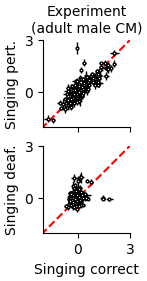

In [4]:
fig, ax = plt.subplots(2, figsize=(1.5,2.8), sharex='all')
# ax[0].scatter(z_correct, z_pert, s=8, c='k', zorder=-1)
# ax[1].scatter(mean_predeaf, mean_postdeaf, s=8, c='k', zorder=-1)
ax[0].errorbar(mean_corr, mean_pert, xerr=se_corr, yerr=se_pert, 
               fmt='o', ms=2, c='w', mec='k', 
               mew=1, ecolor='k', elinewidth=1)
ax[1].errorbar(mean_predeaf, mean_postdeaf, xerr=se_predeaf, yerr=se_postdeaf,  
               fmt='o', ms=2, c='w', mec='k', 
               mew=1, ecolor='k', elinewidth=1)
for i, l in enumerate(['Singing pert.', 'Singing deaf.']):
    ax[i].plot([-3,8], [-3,8], c='r', ls='--', zorder=-2)
    ax[i].set(xlim=[-2,3], ylim=[-2,3], xticks=[0,3], yticks=[0,3], 
              ylabel=l)
    ax[i].set_rasterization_zorder(0)
    ax[i].axes.set_aspect('equal')
ax[0].set_title('Experiment\n(adult male CM)')
ax[-1].set(xlabel='Singing correct')
fig.savefig('../svg/joint_dist_c_vs_nc_experiment.svg', dpi=300)

152 245


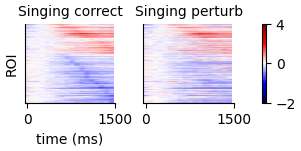

In [5]:
idx = temporal_sort(signal_mean_corr, by='dmean', t0=tpre)[1]
fig, ax = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(3,1.5))
norm = TwoSlopeNorm(0, -2, 4)
im = ax[0].imshow(signal_mean_corr[:,idx].T, cmap='seismic', norm=norm)
# ax[0].scatter(tmax-2, np.arange(len(idx)), marker='.', s=0.5, c='yellow', alpha=1)
ax[1].imshow(signal_mean_pert[:,idx].T, cmap='seismic', norm=norm)
ax[0].set(yticks=[], xticks=[0, 18], xticklabels=[0, 1500], 
          xlabel='time (ms)', ylabel='ROI', title='Singing correct')
ax[1].set(title='Singing perturb')
fig.colorbar(im, ax=ax, ticks=[-2, 0, 4])
fig.savefig('../svg/supplementary/raster_corr_vs_pert_experiment.svg', bbox_inches='tight')

53 108


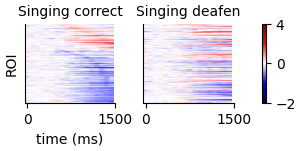

In [6]:
idx = temporal_sort(signal_mean_predeaf, by='dmean', t0=tpre)[1]
fig, ax = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(3,1.5))
norm = TwoSlopeNorm(0, -2, 4)
im = ax[0].imshow(signal_mean_predeaf[:,idx].T, cmap='seismic', norm=norm)
# ax[0].scatter(tmax-2, np.arange(len(idx)), marker='.', s=0.5, c='yellow', alpha=1)
ax[1].imshow(signal_mean_postdeaf[:,idx].T, cmap='seismic', norm=norm)
ax[0].set(yticks=[], xticks=[0, 18], xticklabels=[0, 1500], 
          xlabel='time (ms)', ylabel='ROI', title='Singing correct')
ax[1].set(title='Singing deafen')
fig.colorbar(im, ax=ax, ticks=[-2, 0, 4])
fig.savefig('../svg/supplementary/raster_pre_vs_postdeaf_experiment.svg', bbox_inches='tight')

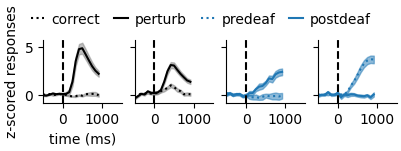

In [7]:
fig, ax = plt.subplots(1, 4, figsize=(4, 1.5), sharex='all', sharey='all')

dt = 1/12 * 1000
ts = (np.arange(t0-tpre, t1) - 60) * dt
idx1 = np.argsort(mean_pert - mean_corr)[[-1, -2]]
idx2 = np.argsort(mean_postdeaf - mean_predeaf)[[-1, 0]]
for i, j in enumerate(idx1):
    ax[i].plot(ts, signal_mean_corr[:,j], c='k', ls=':', label='correct' if i == 0 else '')
    ax[i].plot(ts, signal_mean_pert[:,j], c='k', label='perturb' if i == 0 else '')
    ax[i].fill_between(ts, signal_mean_corr[:,j]-signal_se_corr[:,j], 
                       signal_mean_corr[:,j]+signal_se_corr[:,j], color='gray', alpha=0.5)
    ax[i].fill_between(ts, signal_mean_pert[:,j]-signal_se_pert[:,j], 
                       signal_mean_pert[:,j]+signal_se_pert[:,j], color='gray', alpha=0.5)
    ax[i].axvline(0, ls='--', c='k')
for i, j in enumerate(idx2):
    ax[i+2].plot(ts, signal_mean_predeaf[:,j], c='C0', ls=':', label='predeaf' if i == 0 else '')
    ax[i+2].plot(ts, signal_mean_postdeaf[:,j], c='C0', label='postdeaf' if i == 0 else '')
    ax[i+2].fill_between(ts, signal_mean_predeaf[:,j]-signal_se_predeaf[:,j], 
                       signal_mean_predeaf[:,j]+signal_se_predeaf[:,j], color='C0', alpha=0.5)
    ax[i+2].fill_between(ts, signal_mean_postdeaf[:,j]-signal_se_postdeaf[:,j], 
                       signal_mean_postdeaf[:,j]+signal_se_postdeaf[:,j], color='C0', alpha=0.5)
    ax[i+2].axvline(0, ls='--', c='k')
ax[0].set(xlabel='time (ms)', ylabel='z-scored responses', title='\n', xlim=[-500, 1500])
fig.legend(ncols=4, loc='upper center')
fig.savefig('../svg/example_exp_units.svg', bbox_inches='tight', dpi=300)